## methods to check collinearity:

1. corr()
2. sns.pairplot
3. VIF (variance inflation factor) - most important! 
4. statsmodels/regression.linear_model.OLS (ordinary least squares)
5. sns.heatmap 
6. understanding data (for example, C vs F for temperature)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Lesson15-Salary_Data.csv")
df.head()

,Sex,Age,YearsExperience,Salary
0,0,24,1.1,39343
1,1,25,1.3,46205
2,0,24,1.5,37731
3,1,25,2.0,43525
4,0,25,2.2,39891


In [3]:
df.corr()

,Sex,Age,YearsExperience,Salary
Sex,1.000000,0.050028,0.066731,0.045346
Age,0.050028,1.000000,0.994212,0.982714
YearsExperience,0.066731,0.994212,1.000000,0.978242
Salary,0.045346,0.982714,0.978242,1.000000


In [4]:
X =X1= df.iloc[:,:3] #X1 for use later 
y = df.iloc[:,-1]
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

## method 1 - corr()

In [5]:
X.corr()

,Sex,Age,YearsExperience
Sex,1.000000,0.050028,0.066731
Age,0.050028,1.000000,0.994212
YearsExperience,0.066731,0.994212,1.000000


## method 2 - sns.pairplot

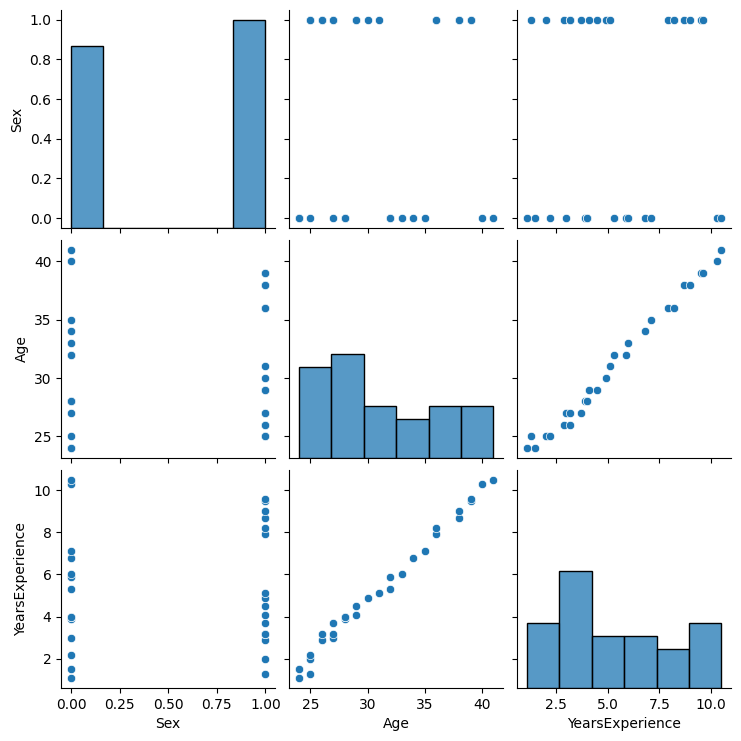

In [6]:
sns.pairplot(X)

## method 3 - VIF - variance inflation factor

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#pip install statsmodel

In [8]:
def vif(X):
    #calculating VIF
    vif = pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [9]:
vif(X)

,variables,VIF
0,Sex,2.134910
1,Age,12.138593
2,YearsExperience,10.367631


In [10]:
X=X.drop("Age",axis=1)

In [11]:
X

,Sex,YearsExperience
0,0,1.1
1,1,1.3
2,0,1.5
3,1,2.0
4,0,2.2
5,1,2.9
6,0,3.0
7,1,3.2
8,1,3.2
9,1,3.7


In [12]:
vif(X)

,variables,VIF
0,Sex,1.804751
1,YearsExperience,1.804751


## method 4

In [13]:
X1

,Sex,Age,YearsExperience
0,0,24,1.1
1,1,25,1.3
2,0,24,1.5
3,1,25,2.0
4,0,25,2.2
5,1,26,2.9
6,0,27,3.0
7,1,26,3.2
8,1,27,3.2
9,1,27,3.7


In [14]:
import statsmodels.api as sm

In [15]:
X2 = sm.add_constant(X1)
X2

,const,Sex,Age,YearsExperience
0,1.0,0,24,1.1
1,1.0,1,25,1.3
2,1.0,0,24,1.5
3,1.0,1,25,2.0
4,1.0,0,25,2.2
5,1.0,1,26,2.9
6,1.0,0,27,3.0
7,1.0,1,26,3.2
8,1.0,1,27,3.2
9,1.0,1,27,3.7


In [16]:
model = sm.OLS(y,X2).fit()    #OLS: ordinary least squares

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           3.49e-19
Time:                        19:34:11   Log-Likelihood:                -297.95
No. Observations:                  30   AIC:                             603.9
Df Residuals:                      26   BIC:                             609.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.833e+04   3.72e+04     -1.838      0.078   -1.45e+05    8094.672
Sex              -311.4461   1984.473     -0.157      0.877   -4390.590    3767.697
Age              4463.4461   1750.353      2.550      0.017     865.544    8061.348
YearsExperience  1098.8909   3298.652      0.333      0.742   -5681.586    7879.368
==============================================================================
Omnibus:                        1.673   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.020
Skew:                           0.451   Prob(JB):                        0.601
Kurtosis:                       3.058   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# from sklearn.datasets import load_boston

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = pd.DataFrame(data)
y = pd.DataFrame(target)

In [19]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
X.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]


# #Variables in order:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

In [21]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## method 5 - sns.heatmap

<Axes: >

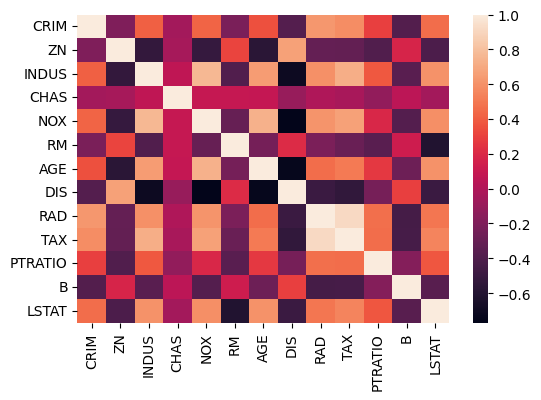

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(X.corr())

In [24]:
X1 = X.dropna()

In [25]:
vif(X1)

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [26]:
X1 = X1.drop("PTRATIO",axis=1)
X1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,393.45,6.48


In [27]:
vif(X1)

,variables,VIF
0,CRIM,2.099345
1,ZN,2.451624
2,INDUS,14.275283
3,CHAS,1.142167
4,NOX,73.894171
5,RM,60.598846
6,AGE,21.361234
7,DIS,12.221605
8,RAD,15.159162
9,TAX,59.301541


In [28]:
X1 = X1.drop("NOX",axis=1)
vif(X1)

,variables,VIF
0,CRIM,2.097537
1,ZN,2.449661
2,INDUS,13.150904
3,CHAS,1.138277
4,RM,41.406746
5,AGE,19.889623
6,DIS,12.032952
7,RAD,15.155012
8,TAX,57.720347
9,B,18.396072


In [29]:
X1 = X1.drop("TAX",axis=1)
vif(X1)

,variables,VIF
0,CRIM,2.097466
1,ZN,2.375219
2,INDUS,9.290080
3,CHAS,1.118613
4,RM,39.069063
5,AGE,19.780944
6,DIS,11.817803
7,RAD,4.965633
8,B,18.289917
9,LSTAT,9.046248


In [30]:
X1 = X1.drop("RM",axis=1)
vif(X1)

,variables,VIF
0,CRIM,2.095367
1,ZN,2.334763
2,INDUS,9.016142
3,CHAS,1.116229
4,AGE,14.000758
5,DIS,8.447694
6,RAD,4.771767
7,B,13.537020
8,LSTAT,8.358925


In [31]:
X1 = X1.drop(["AGE","B"],axis=1)
vif(X1)

,variables,VIF
0,CRIM,2.067135
1,ZN,2.299351
2,INDUS,6.900077
3,CHAS,1.086574
4,DIS,3.968908
5,RAD,4.678181
6,LSTAT,6.726973


<Axes: >

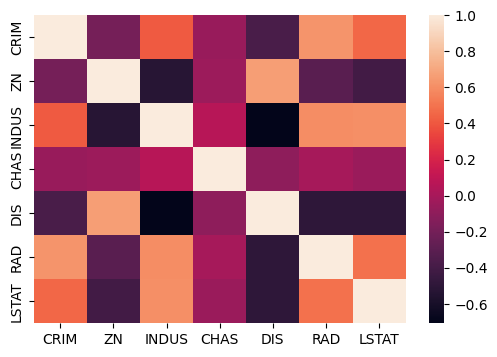

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(X1.corr())

## Variables in order:
 CRIM     per capita crime rate by town
 
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 INDUS    proportion of non-retail business acres per town
 
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 NOX      nitric oxides concentration (parts per 10 million)
 
 RM       average number of rooms per dwelling
 
 AGE      proportion of owner-occupied units built prior to 1940
 
 DIS      weighted distances to five Boston employment centres
 
 RAD      index of accessibility to radial highways
 
 TAX      full-value property-tax rate per $10,000
 
 PTRATIO  pupil-teacher ratio by town
 
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 LSTAT    % lower status of the population
 
 MEDV     Median value of owner-occupied homes in $1000's